In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Installing and importing fasttext to our project
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227137 sha256=b1f73168b7d65a4f9947e9649bea7f21e04d426312e0c2f82be2ca34e2604536
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [4]:
# We use Google Colab virtual machine to read from and write to files in our Google Drive directly.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading csv files and creating datasets according to data
comment_dataset = pd.read_csv('train_data.csv')
comment_dataset_test = pd.read_csv('test_data.csv')

In [6]:
# Displaying data set to test above operation
print(comment_dataset)
print(comment_dataset_test)

                                                 content  score  upvotes
0                                   cox gozel ve rahatdi      5        0
1      proqram deyil zibildirbağlanmırçıxmaq istəyirs...      1        0
2                                   cox  gozel proqramdi      5        2
3      ödəniş etmək lazım olanda daxil olmaq olmurpro...      2        1
4      çox rahatdı ödənişləri rahat etmək olur isdəni...      5        0
...                                                  ...    ...      ...
61961  kabinetə niyə daxil ola bilmirəm qeydiyatda dü...      1        0
61962                                                əla      4        0
61963                     əla proqramdırsadə və rahatdır      5        2
61964                                            yaxşıdı      5        0
61965  bu proqramı yukləyirem yuklənmir nece edim ki ...      5        1

[61966 rows x 3 columns]
                                                 content  score  upvotes
0                        

In [7]:
comment_dataset

,content,score,upvotes
0,cox gozel ve rahatdi,5,0
1,proqram deyil zibildirbağlanmırçıxmaq istəyirs...,1,0
2,cox gozel proqramdi,5,2
3,ödəniş etmək lazım olanda daxil olmaq olmurpro...,2,1
4,çox rahatdı ödənişləri rahat etmək olur isdəni...,5,0
...,...,...,...
61961,kabinetə niyə daxil ola bilmirəm qeydiyatda dü...,1,0
61962,əla,4,0
61963,əla proqramdırsadə və rahatdır,5,2
61964,yaxşıdı,5,0


In [8]:
# For preaperaing our data for machine learning, converting score to one-hot encoded format
#converting content to list
score = np.eye(5)[np.array(comment_dataset['score']) - 1]
content = comment_dataset['content'].values.tolist()

# Same process but for our test data
score_test = np.eye(5)[np.array(comment_dataset_test['score']) - 1]
content_test = comment_dataset_test['content'].values.tolist()

In [9]:
# Tokenizing our data
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(content)

In [10]:
# Displaying the word index for testing tokenization process
tokenizer.word_index

{'əla': 1,
 'çox': 2,
 'bu': 3,
 'cox': 4,
 'bir': 5,
 'gözəl': 6,
 'yaxşı': 7,
 'salam': 8,
 'super': 9,
 'və': 10,
 'olar': 11,
 'amma': 12,
 'gozel': 13,
 'edirəm': 14,
 'pis': 15,
 'olmur': 16,
 'var': 17,
 'ki': 18,
 'proqram': 19,
 'mən': 20,
 'ela': 21,
 'hər': 22,
 'pul': 23,
 'yaxsi': 24,
 'proqramdır': 25,
 '1': 26,
 'əladı': 27,
 'əladır': 28,
 'deyil': 29,
 'ama': 30,
 'daha': 31,
 'olur': 32,
 'nə': 33,
 'üçün': 34,
 'rahat': 35,
 'edirem': 36,
 'da': 37,
 'men': 38,
 'yaxşıdı': 39,
 'olmasa': 40,
 'bank': 41,
 'kimi': 42,
 'bilmirəm': 43,
 've': 44,
 'olsun': 45,
 'olsa': 46,
 'sonra': 47,
 'də': 48,
 'proqramdı': 49,
 'tez': 50,
 'proqramdi': 51,
 'indi': 52,
 'kart': 53,
 'qeydiyyatdan': 54,
 'daxil': 55,
 'edin': 56,
 'belə': 57,
 'istifadə': 58,
 'ne': 59,
 'işləmir': 60,
 'internet': 61,
 'deyir': 62,
 'niyə': 63,
 'necə': 64,
 '5': 65,
 'her': 66,
 'heç': 67,
 'bilmirem': 68,
 'ulduz': 69,
 'şey': 70,
 'bunu': 71,
 'verir': 72,
 'etmək': 73,
 'təşəkkürlər': 74,
 'ya

In [11]:
# Converting text data in content to sequences of integers
train_tokens = tokenizer.texts_to_sequences(content)

In [12]:
# To test tokenize process,displaying tokenized data
print(content[1800])
print(train_tokens[1800])

her zaman tam vaxtinda mohtesem xidmet ucun tesekkurler bolt ailesi 
[66, 207, 200, 1062, 1961, 437, 125, 422, 175, 5953]


In [13]:
# Tokenizing test data
test_tokens = tokenizer.texts_to_sequences(content_test)

In [14]:
# Calculating and displaying token statistics to testing
num_tokens = [len(tokens) for tokens in train_tokens + test_tokens]
num_tokens = np.array(num_tokens)
print("Mean number of tokens:", np.mean(num_tokens))
print("Max number of tokens:", np.max(num_tokens))
print("Index of max tokens:", np.argmax(num_tokens))

Mean number of tokens: 5.499677244442149
Max number of tokens: 222
Index of max tokens: 75565


In [15]:
# Set the maximum number of tokens based on mean and standard deviation
max_tokens = int(np.mean(num_tokens) + 2 * np.std(num_tokens))

In [16]:
max_tokens

19

In [17]:
# Pad the sequences
train_tokens_pad = pad_sequences(train_tokens, maxlen=max_tokens)
test_tokens_pad = pad_sequences(test_tokens, maxlen=max_tokens)

In [18]:
# To test padded data, displaying padded data shapes
print("Train tokens shape:", train_tokens_pad.shape)
print("Test tokens shape:", test_tokens_pad.shape)

Train tokens shape: (61966, 19)
Test tokens shape: (15492, 19)


In [19]:
# Creating a mapping from index to word
word_index = tokenizer.word_index
inverse_map = dict(zip(word_index.values(), word_index.keys()))

In [20]:
# This function converts tokens back to text
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token != 0]
    text = ' '.join(words)
    return text

In [21]:
# To test above function, displaying an example 
print(content[1800])
print(tokens_to_string(train_tokens[1800]))

her zaman tam vaxtinda mohtesem xidmet ucun tesekkurler bolt ailesi 
her zaman tam vaxtinda mohtesem xidmet ucun tesekkurler bolt ailesi


In [22]:
# Building sequential model for buildin neural network layer
model = Sequential()

In [23]:
# Set embedding size
embedding_size = 300

In [24]:
import fasttext.util

#fasttext.util.download_model('az', if_exists='ignore')
ft = fasttext.load_model('/content/drive/MyDrive/Colab Notebooks/cc.az.300.bin')  # Loading pre-trained FastText model

# For creating fasttext embeddings
def create_fasttext_embeddings(tokenizer, num_words, embedding_size):
    embedding_matrix = np.zeros((num_words, embedding_size))
    for word, i in tokenizer.word_index.items():
        if i < num_words:
            embedding_vector = ft.get_word_vector(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix

# Creating FastText embeddings by using the above function
fasttext_embeddings = create_fasttext_embeddings(tokenizer, num_words, embedding_size)

# Adding FastText embeddings as a layer to our model
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    weights=[fasttext_embeddings],
                    input_length=max_tokens,
                    trainable=False, 
                    name='embedding_layer'))

In [25]:
# Adding GRU layers to our model
model.add(GRU(units=16, return_sequences=True))
model.add(GRU(units=8, return_sequences=True))
model.add(GRU(units=4))
model.add(Dense(1, activation='tanh'))

In [26]:
# Compiling our model for training 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
# Displaying our model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding  (None, 19, 300)           3000000   
 )                                                               
                                                                 
 gru (GRU)                   (None, 19, 16)            15264     
                                                                 
 gru_1 (GRU)                 (None, 19, 8)             624       
                                                                 
 gru_2 (GRU)                 (None, 4)                 168       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 3016061 (11.51 MB)
Trainable params: 16061 (62.74 KB)
Non-trainable params: 3000000 (11.44 MB)
_____________

In [28]:
""" threshold = 3.5
labels = [1 if scor >= threshold else 0 for scor in score]
score = np.array(labels)

labels = [1 if scor >= threshold else 0 for scor in score_test]
score_test = np.array(labels) """


' threshold = 3.5\nlabels = [1 if scor >= threshold else 0 for scor in score]\nscore = np.array(labels)\n\nlabels = [1 if scor >= threshold else 0 for scor in score_test]\nscore_test = np.array(labels) '

In [29]:
# Training our model
upvotes = np.array(comment_dataset['upvotes'].values.tolist())
model.fit(train_tokens_pad, score, epochs=5, batch_size=256, sample_weight=upvotes)

embedding_layer = model.get_layer('embedding_layer')
embeddings = embedding_layer.get_weights()[0]
word_index = tokenizer.word_index


Epoch 1/5
243/243 [==============================] - 19s 51ms/step - loss: 0.8138 - accuracy: 0.8000
Epoch 2/5
243/243 [==============================] - 13s 53ms/step - loss: 0.8038 - accuracy: 0.8000
Epoch 3/5
243/243 [==============================] - 13s 53ms/step - loss: 0.8028 - accuracy: 0.8000
Epoch 4/5
243/243 [==============================] - 12s 51ms/step - loss: 0.8027 - accuracy: 0.8000
Epoch 5/5
243/243 [==============================] - 12s 50ms/step - loss: 0.8025 - accuracy: 0.8000


In [30]:
# Evaluating our model on the test set
test_ratings = np.array(score_test)
evaluation_result = model.evaluate(test_tokens_pad, test_ratings)
print("Test accuracy:", evaluation_result[1])

485/485 [==============================] - 6s 9ms/step - loss: 0.5005 - accuracy: 0.8000
Test accuracy: 0.7999972701072693


In [31]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# For visualizing sentiment scores distribution
def visualize_sentiment_scores(scores):
    plt.hist(scores, bins=5, range=(1, 6), align='left', edgecolor='black')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title('Sentiment Scores Distribution')
    plt.xticks(range(1, 6))
    plt.grid(True)
    plt.show()

# For visualizing word embeddings space
def visualize_word_embeddings(embeddings, word_index):
    tsne = TSNE(n_components=2, random_state=442)
    embeddings_tsne = tsne.fit_transform(embeddings)

    plt.figure(figsize=(100, 100))
    for word, idx in word_index.items():
        if idx < 1000:  # Plot only a subset of words for better visualization
            plt.scatter(embeddings_tsne[idx, 0], embeddings_tsne[idx, 1])
            plt.annotate(word, (embeddings_tsne[idx, 0], embeddings_tsne[idx, 1]))
    plt.title('Word Embeddings Space (t-SNE)')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

# For visualizing our model accuracy
def visualize_training_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Over Epochs')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss Over Epochs')
    plt.legend()
    plt.show()

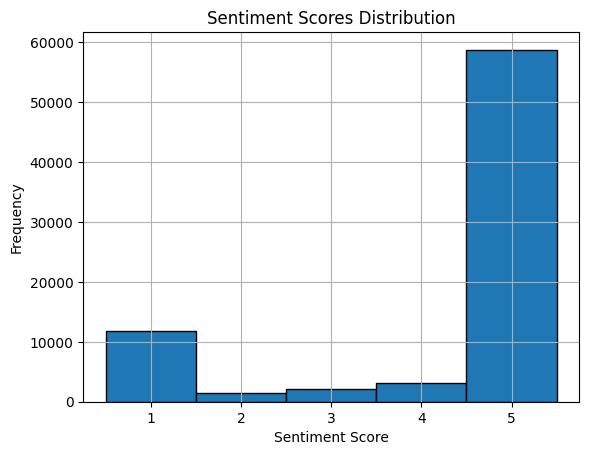

Epoch 1/3
194/194 [==============================] - 21s 77ms/step - loss: 0.5005 - accuracy: 0.8000 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 2/3
194/194 [==============================] - 15s 77ms/step - loss: 0.5005 - accuracy: 0.8000 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 3/3
194/194 [==============================] - 14s 74ms/step - loss: 0.5005 - accuracy: 0.8000 - val_loss: 0.5005 - val_accuracy: 0.8000


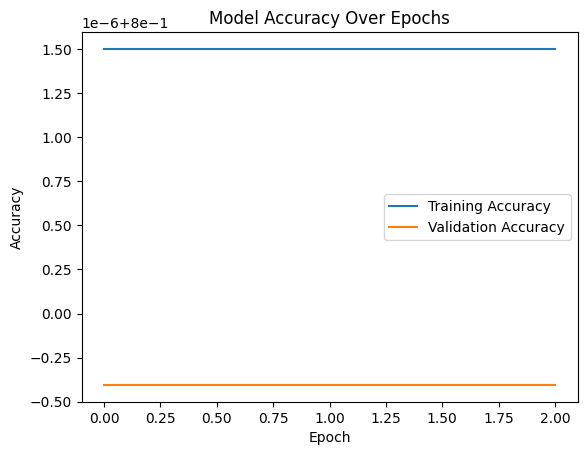

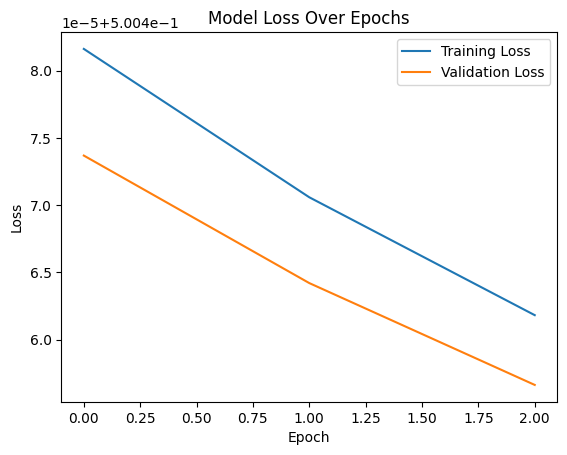

In [32]:
visualize_sentiment_scores(pd.concat([comment_dataset['score'], comment_dataset_test['score']]))
visualize_word_embeddings(embeddings, word_index)
history = model.fit(train_tokens_pad,np.eye(5)[np.array(pd.concat([comment_dataset['score'], comment_dataset_test['score']])) - 1] , epochs=3, batch_size=256, validation_split=0.2)
visualize_training_history(history)